<a href="https://colab.research.google.com/github/ucsd-cse-spis-2023/spis23-lab05-Ngoc-Alexis/blob/main/spis23_lab05_NGOC_Alexis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
from PIL import Image

bear = Image.open( "bear.png" )

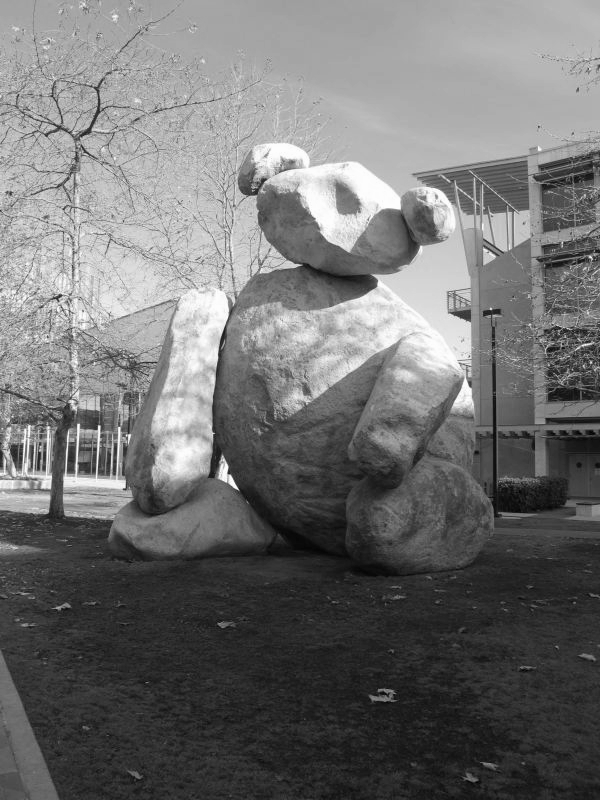

In [20]:
def grayscale(im):
    # Find the dimensions of the image
    (width, height) = im.size

    for x in range( width ):
        for y in range( height ):
            (red, green, blue) = im.getpixel((x, y))
            # Complete this function by adding your lines of code here.
            # You need to calculate the new pixel values and then to change them
            red = int((red* 0.21) )
            green = int((green * 0.72))
            blue = int((blue*0.07) )
            luminance = (red + green + blue)
            # in the image using putpixel()
            im.putpixel((x,y), (luminance , luminance , luminance))
    display(im)
grayscale(bear)
#bear.save("new_bear.png") # create/overwrite new_bear.png with current image
#display(bear)

In [ ]:
def binarize(im, thresh, startx, starty, endx, endy):
    # Find the dimensions of the image
    (width, height) = im.size

    for x in range( startx, endx):
        for y in range( starty, endy):
            (red, green, blue) = im.getpixel((x,y))
            red= red*0.21
            green = green * 0.72
            blue =  blue * 0.07
            luminance = int(red+green+blue)
           # print(luminance)

            if luminance > thresh:
              im.putpixel ((x,y),(255,255,255))

            else:
              im.putpixel((x,y ),(0,0,0))



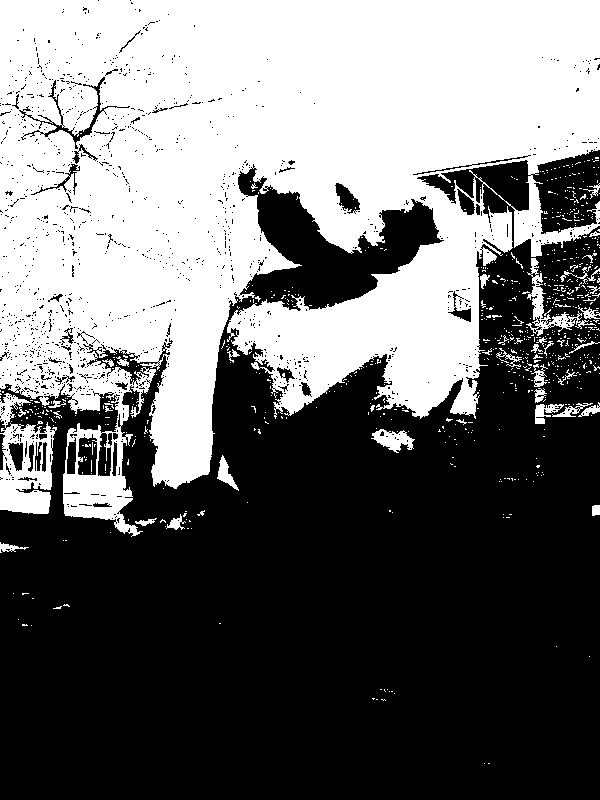

In [ ]:
bear = Image.open( "bear.png" )
#display(im)
binarize(bear,127,0,0,bear.width,bear.height)
bear.save("New_bear.png")
display(bear)

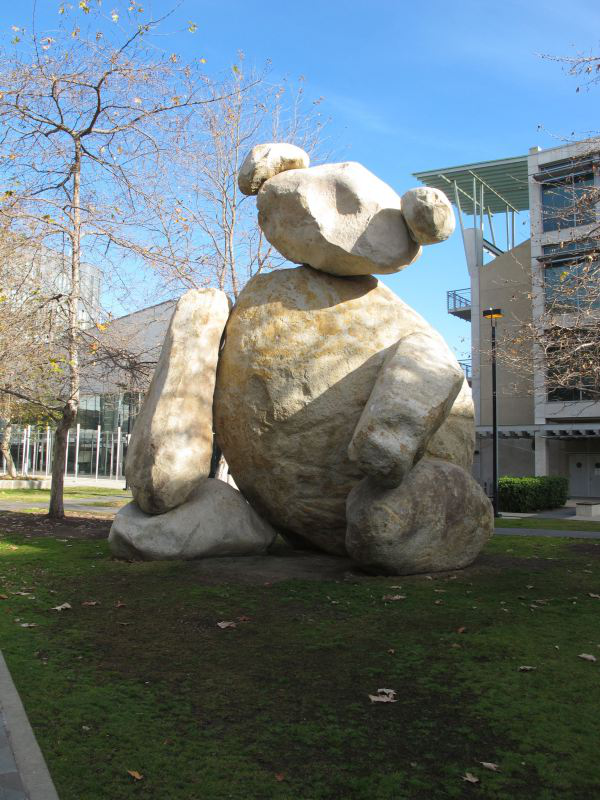

In [ ]:
display(bear)

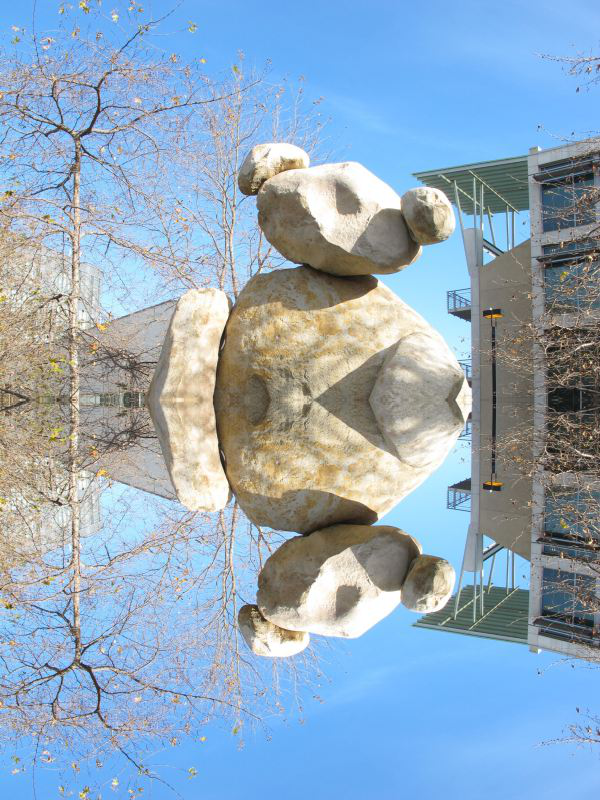

In [ ]:
def mirrorVert(im):
    (width, height) = im.size
    for y in range (int(height/2)):
      for x in range(width):
          pixel_top = im.getpixel((x, y))
          y_mirror = height - y - 1
          im.putpixel((x, y_mirror), pixel_top)


mirrorVert(bear)
display(bear)

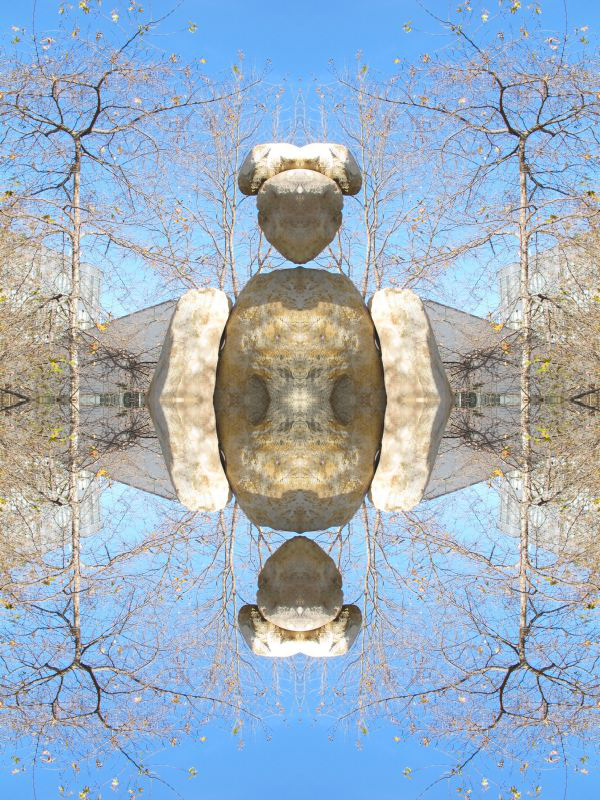

In [ ]:
#Horizontal Mirroring
#Horizontal Mirroring
def mirrorVert(im):
    (width, height) = im.size
    for x in range (int(width/2)):
      for y in range(height):
          pixel_left = im.getpixel((x, y))
          x_mirror = width - x - 1
          im.putpixel((x_mirror,y), pixel_left)


mirrorVert(bear)
display(bear)

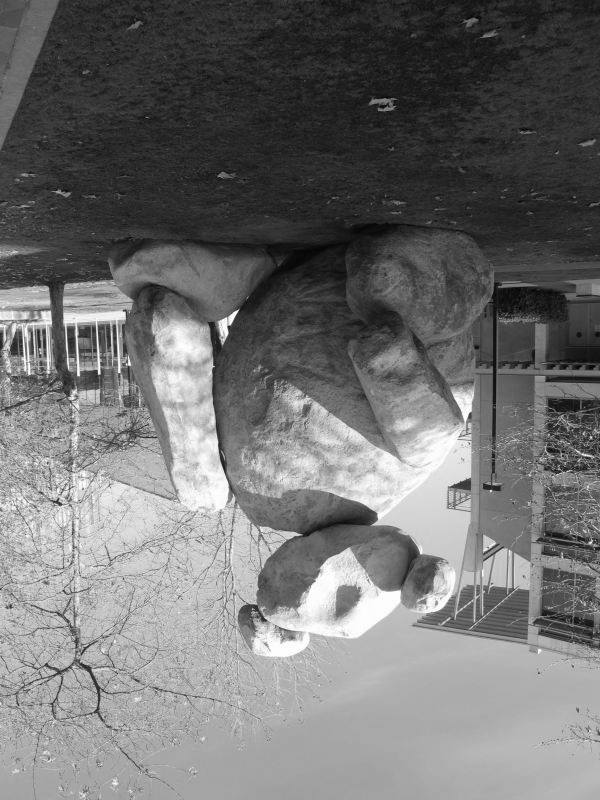

In [25]:


def flipVert(im):
    # Find the dimensions of the image
    (width, height) = im.size
    for x in range(width):
        for y in range(height // 2):
            # Get the pixel values from the original and flipped positions
            pixel_top = im.getpixel((x, y))
            pixel_bottom = im.getpixel((x, height - 1 - y))

            # Swap the pixel values to perform the flip
            im.putpixel((x, y), pixel_bottom)
            im.putpixel((x, height - 1 - y), pixel_top)

# Call the flipVert() function and display the result
flipVert(bear)

display(bear)



In [26]:
from PIL import Image
import random

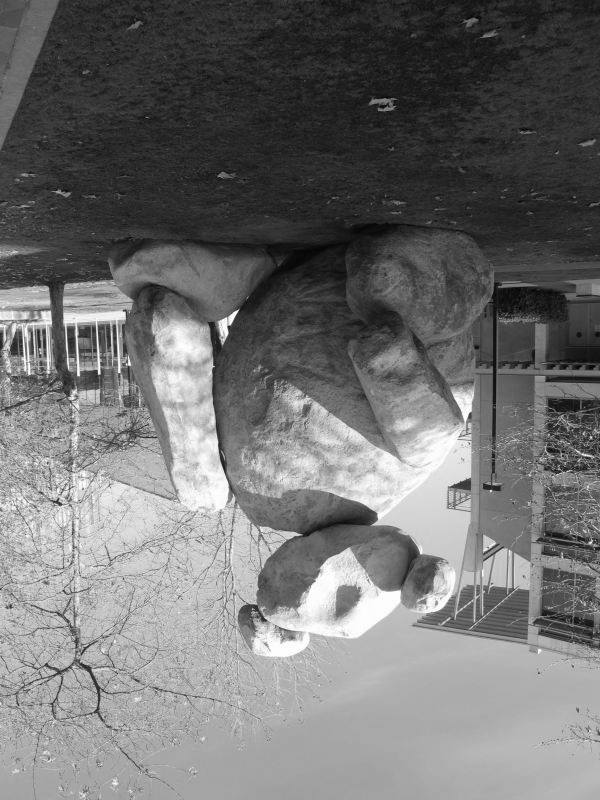

In [31]:
def scale(im):
    # Get the dimensions of the original image
    width, height = im.size

    # Create a new image with half the dimensions
    scaled_im = Image.new('RGB', (width // 2, height // 2))

    # Copy every other pixel to the scaled image
    for x in range(0, width, 2):
        for y in range(0, height, 2):
            pixel = im.getpixel((x, y))
            scaled_im.putpixel((x // 2, y // 2), pixel)

    return scaled_im

def blur(im):
    # Get the dimensions of the image
    width, height = im.size

    # Create a new image for the blur effect
    blurred_im = Image.new('RGB', (width, height))

    # Apply a simple blur by averaging neighboring pixels
    for x in range(width):
        for y in range(height):
            neighbors = [(x + dx, y + dy) for dx in range(-1, 2) for dy in range(-1, 2) if 0 <= x + dx < width and 0 <= y + dy < height]
            avg_color = tuple(sum(im.getpixel((nx, ny))[c] for nx, ny in neighbors) // 9 for c in range(3))
            blurred_im.putpixel((x, y), avg_color)

    return blurred_im

def randomGrid(im, n=4):
    # Get the dimensions of the image
    width, height = im.size

    # Create a new image for the random grid effect
    grid_im = Image.new('RGB', (width, height))

    # Divide the image into an n x n grid
    cell_width = width // n
    cell_height = height // n

    # Create a list of grid cell coordinates
    grid_cells = [(i * cell_width, j * cell_height) for i in range(n) for j in range(n)]

    # Randomly shuffle the grid cell coordinates
    random.shuffle(grid_cells)

    # Copy pixels from original image to the new grid positions
    for i, (x, y) in enumerate(grid_cells):
        for dx in range(cell_width):
            for dy in range(cell_height):
                if x + dx < width and y + dy < height:
                    pixel = im.getpixel((x + dx, y + dy))
                    grid_im.putpixel((i % n * cell_width + dx, i // n * cell_height + dy), pixel)
scale(bear)
blur(bear)
randomGrid(bear, n=4)
display(bear)